# **Setup and Generating Synthetic Data**

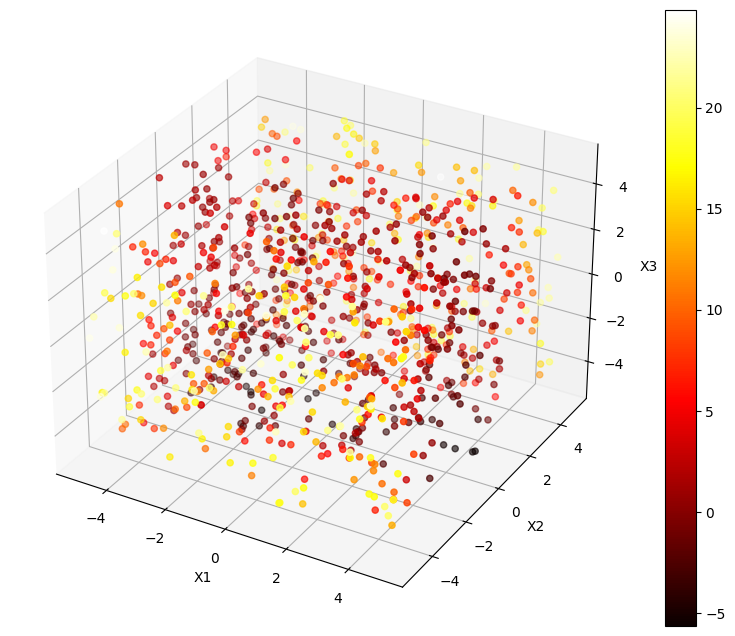

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generating synthetic data
np.random.seed(0)
X_np = np.random.rand(1000, 3) * 10 - 5  # Random values in the range [-5, 5]
y_np = np.sin(X_np[:, 0]) + X_np[:, 1]**2 - np.log1p(np.exp(-X_np[:, 2]))
X = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np).float().view(-1, 1)

# 4D plot function for synthetic data
def plot_4d(X, y):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.squeeze(), cmap=plt.hot())
    fig.colorbar(p)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    plt.show()

plot_4d(X_np, y_np)


# **Neural Network Architecture**

In [4]:
class ThreeLayerNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases as nn.Parameters
        self.W1 = torch.nn.Parameter(torch.randn(input_size, hidden_size))
        self.b1 = torch.nn.Parameter(torch.zeros(hidden_size))
        self.W2 = torch.nn.Parameter(torch.randn(hidden_size, hidden_size))
        self.b2 = torch.nn.Parameter(torch.zeros(hidden_size))
        self.W3 = torch.nn.Parameter(torch.randn(hidden_size, output_size))
        self.b3 = torch.nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        # Forward pass using einsum for matrix multiplication
        A1 = torch.einsum('ij,jk->ik', x, self.W1) + self.b1
        Z1 = torch.relu(A1)
        A2 = torch.einsum('ij,jk->ik', Z1, self.W2) + self.b2
        Z2 = torch.relu(A2)
        A3 = torch.einsum('ij,jk->ik', Z2, self.W3) + self.b3
        return A3


# **Training the Model**

Epoch 1/1000, Loss: 15100.3525390625
Epoch 101/1000, Loss: 27.004192352294922
Epoch 201/1000, Loss: 10.886984825134277
Epoch 301/1000, Loss: 6.876219272613525
Epoch 401/1000, Loss: 5.192911624908447
Epoch 501/1000, Loss: 4.212339878082275
Epoch 601/1000, Loss: 3.5574910640716553
Epoch 701/1000, Loss: 3.0576531887054443
Epoch 801/1000, Loss: 2.666935682296753
Epoch 901/1000, Loss: 2.3713583946228027


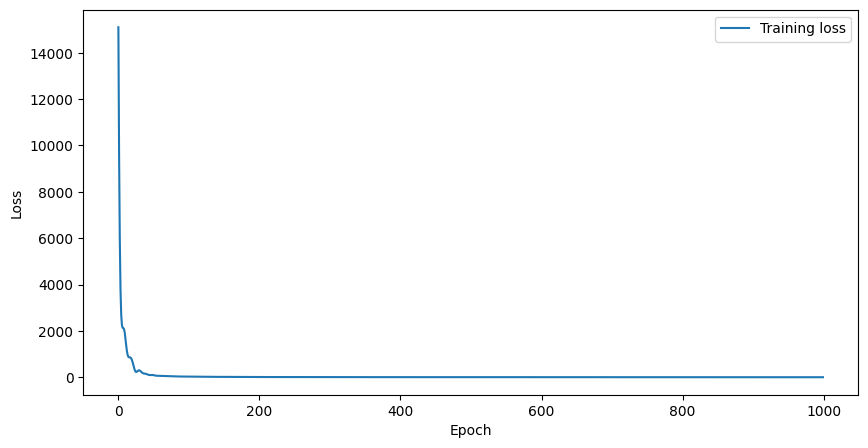

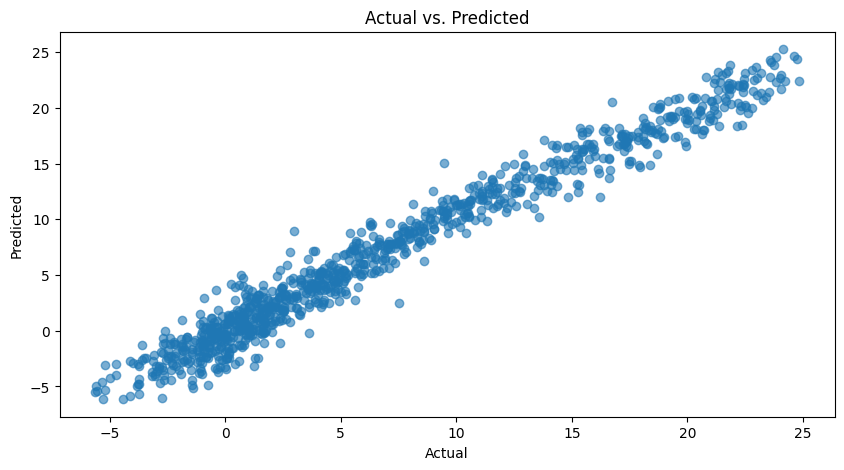

In [5]:
# Model parameters
input_size = 3
hidden_size = 64
output_size = 1
learning_rate = 0.01
epochs = 1000

# Initialize the model, loss, and optimizer
model = ThreeLayerNN(input_size, hidden_size, output_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
loss_history = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X)

    # Compute loss
    loss = criterion(y_pred, y)
    loss_history.append(loss.item())

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs. predicted
with torch.no_grad():
    y_pred = model(X)
    plt.figure(figsize=(10, 5))
    plt.scatter(y, y_pred, alpha=0.6)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')
    plt.show()
